Script to read in the SBML v2 models and save as comets 

In [1]:
import cobra
import sys
import copy
import numpy as np
import pandas as pd
import cometspy as c
import os

os.environ['COMETS_HOME'] = '/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'
os.environ['JAVA_HOME'] = '/share/pkg.7/java/12.0.1/install'
os.environ['PATH'] = '/projectnb2/talbot-lab-data/zrwerbin/venvs/comets/bin:/share/pkg.7/gurobi/9.1.1/install/bin:/share/pkg.7/python3/3.8.10/install/bin:/share/pkg.7/java/12.0.1/install/bin:/projectnb/talbot-lab-data/zrwerbin/temporal_forecast/data_construction/microbe/16S_copy_num_normalize/copy_num_normalize:/usr/java/default/jre/bin:/usr/java/default/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/dell/srvadmin/bin:/bin:/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'

In [2]:

def __isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [3]:
model_dir = "/projectnb2/talbot-lab-data/metabolic_models/curated_models/" # model location

NEU_c = c.model()
NET_c = c.model()
NMU_c = c.model()
NOC_c = c.model()
NDE_c = c.model()
NWI_c = c.model()
NHA_c = c.model()
NSP_c = c.model()

NDE_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_defluvii_NOB.cmd')
NSP_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_gracilis_NOB.cmd')
NMU_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_multiformis_AOB.cmd')
NET_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_eutropha_AOB.cmd')
NEU_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_europaea_AOB.cmd')
NOC_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_oceani_AOB.cmd')
NWI_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_winogradskyi_NOB.cmd')
NHA_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_hamburgensis_NOB.cmd')


In [4]:
from cometspy.utils import grow_rocks, pick_random_locations

grid_width =  20 # narrow, so we can really look at stratification
grid_height =  60

grid_width =  10 # narrow, so we can really look at stratification
grid_height =  40
n_rocks = 50 # 70
rock_locs = grow_rocks(n = n_rocks, xrange = [1,grid_width-1],yrange = [1,grid_height-1],mean_size = 2)

Each species will have biomass seeded at 60 different locations. First we make a copy of the rock_locs so we don't accidentally alter it, and call this copy forbidden_locs. Next we pick the random locations for each species. One big list of locations is created, then species each get a portion of that list.

In [5]:
import copy
forbidden_locs = copy.deepcopy(rock_locs)

founders_per_species = 50 # 60
founders_per_species = 30 # 60
n_species = 15
init_locs = pick_random_locations(n = founders_per_species*n_species, 
                                   xrange = [1,grid_width], yrange = [1,grid_height], 
                                   forbidden_locs = forbidden_locs)

spec1_locs = init_locs[1:founders_per_species]
spec2_locs = init_locs[founders_per_species + 1:founders_per_species*2]
spec3_locs = init_locs[founders_per_species*2 + 1:founders_per_species*3]
spec4_locs = init_locs[founders_per_species*3 + 1:founders_per_species*4]
spec5_locs = init_locs[founders_per_species*4 + 1:founders_per_species*5]
spec6_locs = init_locs[founders_per_species*5 + 1:founders_per_species*6]
spec7_locs = init_locs[founders_per_species*6 + 1:founders_per_species*7]
spec8_locs = init_locs[founders_per_species*7 + 1:founders_per_species*8]
spec9_locs = init_locs[founders_per_species*8 + 1:founders_per_species*9]
spec10_locs = init_locs[founders_per_species*9 + 1:founders_per_species*10]
spec11_locs = init_locs[founders_per_species*10 + 1:founders_per_species*11]
spec12_locs = init_locs[founders_per_species*11 + 1:founders_per_species*12]
spec13_locs = init_locs[founders_per_species*12 + 1:founders_per_species*13]
spec14_locs = init_locs[founders_per_species*13 + 1:founders_per_species*14]
spec15_locs = init_locs[founders_per_species*14 + 1:founders_per_species*15]

there are fewer available locations than n, returning all available locs


In [6]:
# We set the initial population for each species by using a python list comprehension.

NEU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec1_locs]
NET_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec2_locs]
NMU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec3_locs]
NOC_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec4_locs]
NDE_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec5_locs]
NWI_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec6_locs]
NHA_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec7_locs]
NSP_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec8_locs]


If we wish to take a look at what locations were chosen, we can easily make an image with matplotlib:

In [7]:
# Km values from supplement of Mellbye et al

#Neuro_c.change_km('EX_nh4_e', 36.5) # Ammonium (NH4) exchange reaction 
#Neuro_c.change_km('EX_cpd00007_e', 12.75) # O2 exchange reaction
#Neuro_c.change_km('EX_cpd00011_e', 3.8) ## CO2 exchange reaction 
#Neuro_c.change_km('EX_cpd00418_e', 12.75) # NO, same as O2 exchange reaction
#
#Nwino_c.change_km('EX_cpd00075_e', 0.464)  # Nitrite (NO2) exchange reaction 
#Nwino_c.change_km('EX_cpd00007_e', 51.8) # O2 exchange reaction
#Nwino_c.change_km('EX_cpd00011_e', 0.37) # CO2 exchange reaction 
#Nwino_c.change_km('EX_cpd00418_e', 51.8) # NO, same as O2 exchange reaction

#Neuro_c.change_vmax('R_Ammonuium_Conversion', 36.5) # Ammonium (NH4) exchange reaction 
#Neuro_c.change_vmax('EX_cpd00007_e', 12.75) # O2 exchange reaction
#Neuro_c.change_vmax('EX_cpd00011_e', 3.8) ## CO2 exchange reaction 
#
#Nwino_c.change_vmax('EX_cpd00075_e', 0.464)  # Nitrite (NO2) exchange reaction 
#Nwino_c.change_vmax('EX_cpd00007_e', 51.8) # O2 exchange reaction
#Nwino_c.change_vmax('EX_cpd00011_e', 0.37) # CO2 exchange reaction 

#Neuro_c.change_vmax('EX_cpd00013_e',1000) 
#Neuro_c.change_vmax('EX_cpd00007_e',1000) 
#Neuro_c.change_vmax('EX_cpd00011_e',1000)

Add models to the layout.

In [7]:
layout = c.layout()
layout.grid = [grid_width,grid_height]
layout.add_barriers(rock_locs)
model_list = [NEU_c,
              NET_c,
              NMU_c, 
              NOC_c, 
              NDE_c,
              NWI_c,
              NHA_c,
              NSP_c]
              #iAF9_c,
              #iAF6_c,
              #iRR_c,
              #iJO_c,
              #iPB_c,
              #iJN_c,
              #Nitro_c]
for mod in model_list:
    layout.add_model(mod)

building empty layout model
models will need to be added with layout.add_model()


We want some metabolites available initially. These include all the typical trace nutrients needed, so we start with the helper function.

After that, however, we want oxygen to mostly diffuse from the air, so we set that value lower. We also add a few other trace metabolites homogeneously throughout the environment that were not added with the helper function.

To make the air layer, we set static media, which keep that metabolite at a fixed value.  We also set a static level of zero oxygen at the "bottom," to mimic continuous downwards diffusion.
In a similar fashion, we set a static sink of ammonium where the “root” is.
In contrast to ammonia, which we assume is always entirely consumed by the root, we assume the root drips organic acids and methanol into the environment at fixed rate, so we use a refresh function.

In [8]:
layout.media.head(60)
layout.media.tail(60)

all_mets = layout.media.metabolite
all_mets

for met in all_mets:
    if met in set(layout.media['metabolite']):
        layout.set_specific_metabolite(met,1000)
        
layout.media

layout.write_layout('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/generic_layout.txt')
layout.write_necessary_files('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/')

We are now done prepping the models and the layout. Next we setup the simulation parameters. Note the positive death rate.


In [44]:
params = c.params()
params.set_param('timeStep', 2) # in hours
params.set_param('spaceWidth', .1) # one cell = one cm3
params.set_param('maxCycles', 200)
params.set_param('maxSpaceBiomass', 10) # gDW # max biomass allowed per cell
params.set_param('deathRate', 0.0001) # die at rate of 1/10000 per hour
params.set_param('defaultKm', 0.01)

#params.set_param('BiomassLogName', './biomass.txt')
#params.set_param('MediaLogName', './media.txt')
#params.set_param('SpecificMediaLogName', './specific_media.txt')
#params.set_param('TotalBiomassLogName', './total_biomass.txt')

params.set_param('writeBiomassLog', True)
params.set_param('writeTotalBiomassLog', True)
params.set_param('writeMediaLog', True)
params.set_param("writeFluxLog", True)

params.set_param('BiomassLogRate', 10)
params.set_param('totalBiomassLogRate', 10)
params.set_param('MediaLogRate', 10)
params.set_param("FluxLogRate", 400)

#params.set_param("allowCellOverlap", True)

params.set_param('numRunThreads', 28)
params.set_param("writeSpecificMediaLog", True)
params.set_param("specificMediaLogRate", 50) # time steps
#params.set_param("specificMedia", "nh4_e,no3_e,no2_e,no3_e,no2_e,n2o_e,no2_e,h2o_e,o2_e,h2_e") # metabolites to track

params.set_param("specificMedia", "nh4_e,no3_e,no2_e,no3_e,no2_e,n2o_e,h2o_e,o2_e,h_e,co2_e") # metabolites to track

In [45]:
#params.write_params('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/global_params.txt',
#                   '/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/pkg_params.txt')
#
#global_params = os.path.join('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/global_params.txt')
#package_params = os.path.join('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/pkg_params.txt')
#
#p = c.params(global_params, package_params)
#p = c.params()

#p = c.params(global_params = '/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/global_params.txt',
#             package_params = '/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/pkg_params.txt')
#print(p)


#p = c.params('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/global_params.txt',
#             '/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/pkg_params.txt')
print(p)

#print(f_lines)


NameError: name 'p' is not defined

In [46]:
params = c.params()
params.write_params('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/global_params.txt',
                   '/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/pkg_params.txt')

In [14]:
# Read in file with parameters
observed_params = pd.read_csv("/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_categories.csv")
observed_params


,Unnamed: 0,moisture,diffusion,ammonium,nitrate,oxygen,co2,id,rownames
0,1,0.22,3.18,0.74,0.00,0.144,0,sim_diff_3.18_nh4_0.74_no3_0_mois_0.22_o2_0.144,1
1,2,0.24,3.18,0.55,0.00,0.150,0,sim_diff_3.18_nh4_0.55_no3_0_mois_0.24_o2_0.15,2
2,3,0.55,3.18,3.20,0.00,0.013,0,sim_diff_3.18_nh4_3.2_no3_0_mois_0.55_o2_0.013,3
3,4,0.51,3.18,2.00,1.76,0.126,0,sim_diff_3.18_nh4_2_no3_1.76_mois_0.51_o2_0.126,4
4,5,0.43,3.18,2.61,0.02,0.007,0,sim_diff_3.18_nh4_2.61_no3_0.02_mois_0.43_o2_0...,5
...,...,...,...,...,...,...,...,...,...
120,121,0.53,2.11,3.46,0.00,0.003,0,sim_diff_2.11_nh4_3.46_no3_0_mois_0.53_o2_0.003,121
121,122,0.46,2.11,3.59,10.64,0.105,0,sim_diff_2.11_nh4_3.59_no3_10.64_mois_0.46_o2_...,122
122,123,0.46,2.11,3.01,2.28,0.111,0,sim_diff_2.11_nh4_3.01_no3_2.28_mois_0.46_o2_0...,123
123,124,0.34,2.11,1.64,0.05,0.103,0,sim_diff_2.11_nh4_1.64_no3_0.05_mois_0.34_o2_0...,124


In [48]:
i = 1
print(i)
specific_scenario = observed_params[observed_params["rownames"] == i]

print(specific_scenario)

diff_constant = specific_scenario.iloc[0]["diffusion"] * .00001
ammon_conc = specific_scenario.iloc[0]["ammonium"] 
nitrate_conc = specific_scenario.iloc[0]["nitrate"] 
h2o = specific_scenario.iloc[0]["moisture"] 
o2 = specific_scenario.iloc[0]["oxygen"] 
co2 = specific_scenario.iloc[0]["co2"] 

#print(diff_constant)
#print(ammon_conc)
#print([diff_constant, ammon_conc, nitrate_conc, h2o])

# Create output path from parameters
output_dir = (specific_scenario.iloc[0]["id"] + '/')
print(output_dir)

output_path = os.path.join("/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_output/" + output_dir)
os.makedirs(output_path, exist_ok = True)

print(output_path)

# Modify layout according to parameters
#specific_layout = copy.deepcopy(layout)
specific_layout = c.layout()
specific_layout.grid = [grid_width,grid_height]
specific_layout.add_barriers(rock_locs)
model_list = [NEU_c,NET_c,NMU_c, NOC_c, NDE_c,NWI_c,NHA_c,NSP_c]

for mod in model_list:
    specific_layout.add_model(mod)
all_mets = specific_layout.media.metabolite    

for met in all_mets:
    if met in set(specific_layout.media['metabolite']):
        specific_layout.set_specific_metabolite(met,1000)

#specific_layout.read_comets_layout(input_obj='/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/.current_layout')

specific_layout.set_metabolite_diffusion(diff_constant)
specific_layout.set_specific_metabolite('nh4_e', ammon_conc)
specific_layout.set_specific_metabolite('h2o_e', h2o)
specific_layout.set_specific_metabolite('no3_e', nitrate_conc)
specific_layout.set_specific_metabolite('o2_e', o2)
specific_layout.media = specific_layout.media.reset_index(drop=True)

sim_specific = c.comets(layout = specific_layout, 
                        parameters= params)
sim_specific.run(delete_files=True)


sim_specific.biomass
#specific_layout.set_specific_metabolite('MNXM729302@MNXC19', ammon_conc)

#specific_layout.set_specific_metabolite('MNXM729302@MNXC2', ammon_conc)
#specific_layout.set_specific_metabolite('MNXM729302@MNXC19', ammon_conc)
#specific_layout.set_specific_static('WATER@MNXC19', h2o)
#specific_layout.set_specific_static('WATER@MNXC2', h2o)
##specific_layout.set_specific_metabolite('MNXM732398@MNXC19', nitrate_conc)
#specific_layout.set_specific_metabolite('MNXM732398@MNXC19', nitrate_conc)
#specific_layout.set_specific_metabolite('MNXM732398@MNXC2', nitrate_conc)


1
   Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
0           1      0.27       3.59      1.01      0.0   0.144    0   

                                                id  rownames  
0  sim_diff_3.59_nh4_1.01_no3_0_mois_0.27_o2_0.144         1  
sim_diff_3.59_nh4_1.01_no3_0_mois_0.27_o2_0.144/
/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_output/sim_diff_3.59_nh4_1.01_no3_0_mois_0.27_o2_0.144/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...


KeyboardInterrupt: 

In [57]:
sim_specific.run_output

'-script\nrunning script file: /projectnb/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/.current_script_0x2b0158991820\nCurrent Java version: 12.0.1\nParameters file .current_global_0x2b0158991820 loaded.\nParameters file .current_package_0x2b0158991820 loaded.\nLoading layout file \'.current_layout_0x2b0158991820\'...\nnull/COMETS_manifest.txt (No such file or directory)\nUnable to initialize manifest file. \nContinuing without writing manifest file.\nFound 8 model files!\nLoading \'./not_metanet_N_europaea_AOB.cmd\' ...\nDone!\n Testing default parameters...\nDone!\nOptimizer status code = 5 (looks ok!)\nobjective solution = 11.090527092826846\nLoading \'./not_metanet_N_eutropha_AOB.cmd\' ...\nDone!\n Testing default parameters...\nDone!\nOptimizer status code = 5 (looks ok!)\nobjective solution = 11.090527092826846\nLoading \'./not_metanet_N_multiformis_AOB.cmd\' ...\nDone!\n Testing default parameters...\nDone!\nOptimizer status code = 5 (looks ok!)\nobjective solution = 7.6

In [32]:
sim_specific = c.comets(layout = specific_layout, parameters= params)
sim_specific.run(delete_files=False)


Running COMETS simulation ...
Done!


In [38]:
#sim_specific.specific_media
#sim_specific.get_biomass_image(layout.models[0].id, 400)
df = sim_specific.get_metabolite_time_series()
df.to_csv(output_path + 'media.csv')

df = sim_specific.get_species_exchange_fluxes
df.to_csv(output_path + 'fluxes.csv')


In [11]:
os.chdir('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/')

In [18]:
sim_list = [21,22,23,24,25,26,27,28,29,30]
sim_list = range(33, 41)

#sim_list = range[2,120]
#sim_list = [21,22,23,24,25,26,27,28,29,30]

sim_list =  range(20, 125)
#sim_list =  range(124, 125)

for i in sim_list:
    #print(params["rownames"] == 1)
    
    print(i)
    specific_scenario = observed_params[observed_params["rownames"] == i]
    
    print(specific_scenario)
    
    diff_constant = specific_scenario.iloc[0]["diffusion"] * .00001
    ammon_conc = specific_scenario.iloc[0]["ammonium"] 
    nitrate_conc = specific_scenario.iloc[0]["nitrate"] 
    h2o = specific_scenario.iloc[0]["moisture"] 
    o2 = specific_scenario.iloc[0]["oxygen"] * .0001 
    co2 = specific_scenario.iloc[0]["co2"] 

    
    #print(diff_constant)
    #print(ammon_conc)
    #print([diff_constant, ammon_conc, nitrate_conc, h2o])
    
    # Create output path from parameters
    output_dir = (specific_scenario.iloc[0]["id"] + '/')
    print(output_dir)
    
    output_path = os.path.join("/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_output/no_static/" + output_dir)
    os.makedirs(output_path, exist_ok = True)
    
    #print(output_path)
    
    # Modify layout according to parameters
    #specific_layout = copy.deepcopy(layout)
    params = c.params()
    params.set_param('timeStep', 1) # in hours
    params.set_param('spaceWidth', .1) # one cell = one cm3
    params.set_param('maxCycles', 200)
    params.set_param('maxSpaceBiomass', 10) # gDW # max biomass allowed per cell
    params.set_param('deathRate', 0.0001) # die at rate of 1/10000 per hour
    params.set_param('defaultKm', 0.0001)
    params.set_param('BiomassLogRate', 20)
    params.set_param('totalBiomassLogRate', 20)
    params.set_param('MediaLogRate', 10)
    params.set_param("FluxLogRate", 20)    
    params.set_param('numRunThreads', 28)
    params.set_param("writeMediaLog", True)
    params.set_param("writeBiomassLog", True)
    params.set_param("writeSpecificMediaLog", True)
    params.set_param("writeFluxLog", True)
    params.set_param("specificMediaLogRate", 10) # time steps
    params.set_param("specificMedia", "nh4_e,no3_e,no2_e,no3_e,no2_e,n2o_e,h2o_e,o2_e,h_e,co2_e") # metabolites to track
    
    
    specific_layout = c.layout()
    specific_layout.grid = [grid_width,grid_height]
    specific_layout.add_barriers(rock_locs)
    model_list = [NEU_c,NET_c,NMU_c, NOC_c, NDE_c,NWI_c,NHA_c,NSP_c]
    for mod in model_list:
        specific_layout.add_model(mod)
    all_mets = specific_layout.media.metabolite    
    for met in all_mets:
        if met in set(specific_layout.media['metabolite']):
            specific_layout.set_specific_metabolite(met,1000)
    
    #specific_layout.read_comets_layout(input_obj='/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/.current_layout')

    specific_layout.set_metabolite_diffusion(diff_constant)
    specific_layout.set_specific_metabolite('nh4_e', ammon_conc)
    specific_layout.set_specific_metabolite('h2o_e', h2o)
    specific_layout.set_specific_metabolite('no3_e', nitrate_conc)
    specific_layout.set_specific_metabolite('no2_e', nitrate_conc)
    specific_layout.set_specific_metabolite('o2_e', o2)
    #specific_layout.set_specific_static('o2_e', o2)
#    specific_layout.set_specific_static('co2_e', 1000)
    specific_layout.set_specific_metabolite('co2_e', 1000)
    specific_layout.set_specific_metabolite('n2o_e', 0.0001)
    specific_layout.set_specific_metabolite('no_e', 0.0001)
    #specific_layout.set_specific_metabolite('co2_e', 0.1)
    #for x in range(grid_width):
    #    specific_layout.set_specific_static_at_location('o2_e', (x,0), o2) # top
    #    specific_layout.set_specific_static_at_location('o2_e', (x,grid_height-1), 0.) # bottom: zero, sink for o2
    
    specific_layout.media   =  specific_layout.media.reset_index(drop=True)
    
    sim = c.comets(specific_layout, params)
    sim.run(delete_files=True)
    #sim.run(delete_files=False)    
    
    sim.biomass.to_csv(output_path + 'biomass.csv')
    sim.total_biomass.to_csv(output_path + 'total_biomass.csv')
    sim.media.to_csv(output_path + 'media.csv')
    sim.fluxes.to_csv(output_path + 'flux.csv')
    
    #df = sim.get_species_exchange_fluxes(layout.models[0].id)
    #df.to_csv(output_path + 'fluxes.csv')


20
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
19          20      0.56       3.18      4.82      0.2   0.013    0   

                                                   id  rownames  
19  sim_diff_3.18_nh4_4.82_no3_0.2_mois_0.56_o2_0.013        20  
sim_diff_3.18_nh4_4.82_no3_0.2_mois_0.56_o2_0.013/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
21
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
20          21      0.48       3.18      2.74      3.0    0.11    0   

                                                id  rownames  
20  sim_diff_3.18_nh4_2.74_no3_3_mois_0.48_o2_0.11        21  
sim_diff_3.18_nh4_2.74_no3_3_mois_0.48_o2_0.11/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running


Running COMETS simulation ...
Done!
35
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
34          35      0.21       3.18      0.61      0.1   0.009    0   

                                                   id  rownames  
34  sim_diff_3.18_nh4_0.61_no3_0.1_mois_0.21_o2_0.009        35  
sim_diff_3.18_nh4_0.61_no3_0.1_mois_0.21_o2_0.009/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
36
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
35          36      0.22       3.18      0.46      0.0   0.009    0   

                                                 id  rownames  
35  sim_diff_3.18_nh4_0.46_no3_0_mois_0.22_o2_0.009        36  
sim_diff_3.18_nh4_0.46_no3_0_mois_0.22_o2_0.009/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to settin


Running COMETS simulation ...
Done!
52
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
51          52      0.43       3.18       0.4      1.7   0.123    0   

                                                  id  rownames  
51  sim_diff_3.18_nh4_0.4_no3_1.7_mois_0.43_o2_0.123        52  
sim_diff_3.18_nh4_0.4_no3_1.7_mois_0.43_o2_0.123/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
53
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
52          53      0.36       3.18      1.48      0.0   0.156    0   

                                                 id  rownames  
52  sim_diff_3.18_nh4_1.48_no3_0_mois_0.36_o2_0.156        53  
sim_diff_3.18_nh4_1.48_no3_0_mois_0.36_o2_0.156/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting s


Running COMETS simulation ...
Done!
66
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
65          66      0.37       3.18      0.53     0.28   0.005    0   

                                                   id  rownames  
65  sim_diff_3.18_nh4_0.53_no3_0.28_mois_0.37_o2_0...        66  
sim_diff_3.18_nh4_0.53_no3_0.28_mois_0.37_o2_0.005/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
67
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
66          67      0.47       3.18      1.27     0.05   0.001    0   

                                                   id  rownames  
66  sim_diff_3.18_nh4_1.27_no3_0.05_mois_0.47_o2_0...        67  
sim_diff_3.18_nh4_1.27_no3_0.05_mois_0.47_o2_0.001/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior t


Running COMETS simulation ...
Done!
80
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
79          80      0.11       2.11      1.68      0.0   0.173    0   

                                                 id  rownames  
79  sim_diff_2.11_nh4_1.68_no3_0_mois_0.11_o2_0.173        80  
sim_diff_2.11_nh4_1.68_no3_0_mois_0.11_o2_0.173/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
81
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
80          81      0.09       2.11       0.5     0.04   0.169    0   

                                                   id  rownames  
80  sim_diff_2.11_nh4_0.5_no3_0.04_mois_0.09_o2_0.169        81  
sim_diff_2.11_nh4_0.5_no3_0.04_mois_0.09_o2_0.169/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to settin


Running COMETS simulation ...
Done!
94
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
93          94      0.44       2.11      4.96     1.88   0.013    0   

                                                   id  rownames  
93  sim_diff_2.11_nh4_4.96_no3_1.88_mois_0.44_o2_0...        94  
sim_diff_2.11_nh4_4.96_no3_1.88_mois_0.44_o2_0.013/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
95
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
94          95      0.08       2.11      0.18      0.0    0.01    0   

                                                id  rownames  
94  sim_diff_2.11_nh4_0.18_no3_0_mois_0.08_o2_0.01        95  
sim_diff_2.11_nh4_0.18_no3_0_mois_0.08_o2_0.01/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting 


Running COMETS simulation ...
Done!
108
     Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
107         108      0.21       2.11      1.85     0.41   0.119    0   

                                                    id  rownames  
107  sim_diff_2.11_nh4_1.85_no3_0.41_mois_0.21_o2_0...       108  
sim_diff_2.11_nh4_1.85_no3_0.41_mois_0.21_o2_0.119/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
109
     Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
108         109      0.42       2.11      2.18     0.91   0.121    0   

                                                    id  rownames  
108  sim_diff_2.11_nh4_2.18_no3_0.91_mois_0.42_o2_0...       109  
sim_diff_2.11_nh4_2.18_no3_0.91_mois_0.42_o2_0.121/
building empty layout model
models will need to be added with layout.add_model()
this should be perform


Running COMETS simulation ...
Done!
122
     Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
121         122      0.46       2.11      3.59    10.64   0.105    0   

                                                    id  rownames  
121  sim_diff_2.11_nh4_3.59_no3_10.64_mois_0.46_o2_...       122  
sim_diff_2.11_nh4_3.59_no3_10.64_mois_0.46_o2_0.105/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
123
     Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
122         123      0.46       2.11      3.01     2.28   0.111    0   

                                                    id  rownames  
122  sim_diff_2.11_nh4_3.01_no3_2.28_mois_0.46_o2_0...       123  
sim_diff_2.11_nh4_3.01_no3_2.28_mois_0.46_o2_0.111/
building empty layout model
models will need to be added with layout.add_model()
this should be perfor

In [59]:
df = sim.get_species_exchange_fluxes('not_metanet_N_defluvii_NOB')
df



AttributeError: 'comets' object has no attribute 'fluxes_by_species'

,cycle,not_metanet_N_europaea_AOB,not_metanet_N_eutropha_AOB,not_metanet_N_multiformis_AOB,not_metanet_N_oceani_AOB,not_metanet_N_defluvii_NOB,not_metanet_N_winogradskyi_NOB,not_metanet_N_hamburgensis_NOB,not_metanet_N_gracilis_NOB
0,0,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07
1,20,1.418423e+02,9.490061e+01,1.259016e+02,8.940601e+01,1.037376e+02,1.776857e+02,7.740394e+01,7.820467e+01
2,40,1.418726e+02,9.485231e+01,1.258033e+02,8.973321e+01,1.037903e+02,1.804941e+02,7.780358e+01,7.848158e+01
3,60,1.420697e+02,9.480093e+01,1.257204e+02,9.005834e+01,1.037993e+02,1.830298e+02,7.818949e+01,7.835230e+01
4,80,1.422011e+02,9.476895e+01,1.256176e+02,9.040363e+01,1.040362e+02,1.847243e+02,7.873556e+01,7.822215e+01


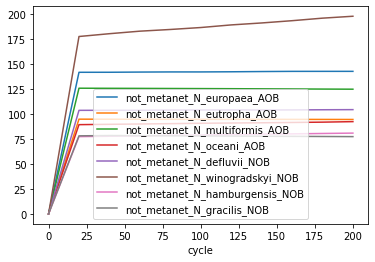

In [16]:
ax1 = sim.total_biomass.plot(x = 'cycle')
sim.total_biomass.head()

In [33]:
#sim.total_biomass['N_winogradskyi_NOB'].plot(x = 'cycle')
#sim.total_biomass['iJN746'].plot(x = 'cycle')
sim.total_biomass['iRR1083'].plot(x = 'cycle')
#sim.total_biomass['N_europaea_AOB'].plot(x = 'cycle')

KeyError: 'iRR1083'

AttributeError: module 'matplotlib' has no attribute 'ylabel'

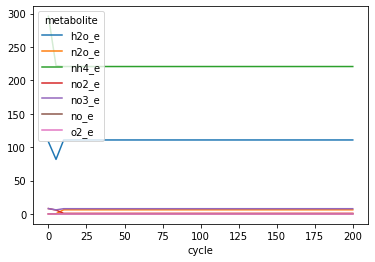

In [71]:
import matplotlib as plt
media = sim.get_metabolite_time_series(upper_threshold = 900)
media.plot(x = "cycle")
plt.ylabel("mmol")

<AxesSubplot:xlabel='cycle'>

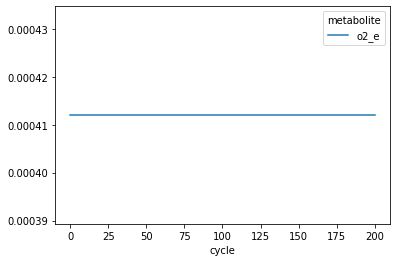

In [72]:

total_media = sim.media.groupby(by = ["metabolite", "cycle"]).agg(func = sum).reset_index().drop(columns = ["x", "y"])
total_media = total_media.pivot(columns = "metabolite", values = "conc_mmol", index = ["cycle"]).reset_index().fillna(0.)
total_media.head()

#total_media[['nh4_e','no2_e','no3_e','cycle']].plot(x = "cycle")
#total_media[['no2_e','no3_e','cycle']].plot(x = "cycle")
total_media[['o2_e','cycle']].plot(x = "cycle")

<AxesSubplot:xlabel='cycle'>

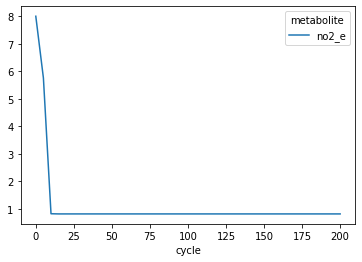

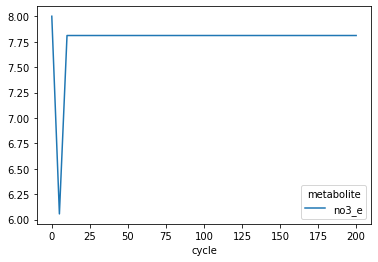

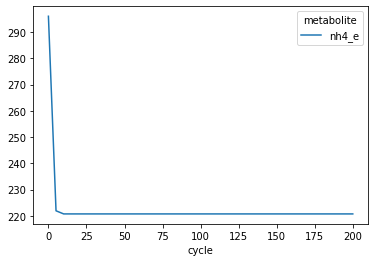

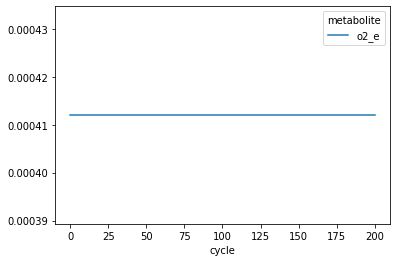

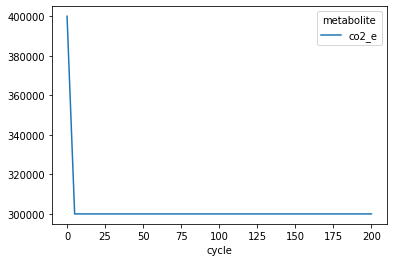

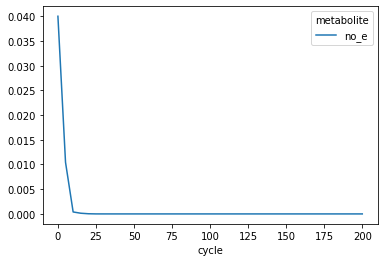

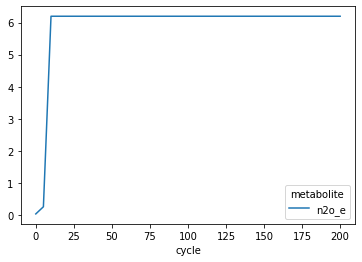

In [74]:
upper_threshold = 9

total_media = sim.media.groupby(by = ["metabolite", "cycle"]).agg(func = sum).reset_index().drop(columns = ["x", "y"])
total_media = total_media.pivot(columns = "metabolite", values = "conc_mmol", index = ["cycle"]).reset_index().fillna(0.)
total_media.head()

#total_media[['nh4_e','no2_e','no3_e','cycle']].plot(x = "cycle")
#total_media[['no2_e','no3_e','cycle']].plot(x = "cycle")
total_media[['no2_e','cycle']].plot(x = "cycle")
total_media[['no3_e','cycle']].plot(x = "cycle")
total_media[['nh4_e','cycle']].plot(x = "cycle")
total_media[['o2_e','cycle']].plot(x = "cycle")
total_media[['co2_e','cycle']].plot(x = "cycle")
#total_media[['glc__D_e','cycle']].plot(x = "cycle")
#total_media[['gam_e','cycle']].plot(x = "cycle")
#total_media[['pyr_e','cycle']].plot(x = "cycle")
#total_media[['ac_e','cycle']].plot(x = "cycle")
#total_media[['man_e','cycle']].plot(x = "cycle")
total_media[['no_e','cycle']].plot(x = "cycle")
total_media[['n2o_e','cycle']].plot(x = "cycle")

In [ ]:

#im4 = sim_diff_06_nh4_10.get_biomass_image('iYO844', params.all_params['maxCycles'])
im5 = sim_diff_06_nh4_10.get_biomass_image('N_europaea_AOB', params.all_params['maxCycles'])
#im6 = sim_diff_06_nh4_10.get_biomass_image('N_winogradskyi_NOB', params.all_params['maxCycles'])

final2 = np.zeros((grid_height,grid_width,3))
#final2[:,:,0] = im4 / np.max(im4)
#final2[:,:,1] = im5 / np.max(im5)
#final2[:,:,2] = im6 / np.max(im6)
#final2[:,:,0] = np.transpose(im4 / np.max(im4))
final2[:,:,1] = np.transpose(im5 / np.max(im5))
#final2[:,:,2] = np.transpose(im6 / np.max(im6))
for rock in rock_locs:
    final2[rock[1]-1,rock[0]-1,0:3] = 0.5 
    
from matplotlib import pyplot as plt
plt.figure(figsize = (60,10))
plt.imshow(final2)

Below here, we show a handful of metabolites. 

In [ ]:
figure, axis = plt.subplots(3, 4,figsize=(10,20))

## INITIAL

axis[0,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",0)))
axis[0,0].set_title("nh4")

axis[0,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",0)))
axis[0,1].set_title("o2")

axis[0,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",0)))
axis[0,2].set_title("co2")

#axis[0,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",0)))
#axis[0,3].set_title("succ_e")


## MIDPOINT

axis[1,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",100)))
axis[1,0].set_title("nh4")

axis[1,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",100)))
axis[1,1].set_title("o2")

axis[1,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",100)))
axis[1,2].set_title("co2")

#axis[1,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",100)))
#axis[1,3].set_title("succ_e")


## FINAL

axis[2,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",params.all_params['maxCycles'])))
axis[2,0].set_title("nh4")

axis[2,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",params.all_params['maxCycles'])))
axis[2,1].set_title("o2")

axis[2,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",params.all_params['maxCycles'])))
axis[2,2].set_title("co2")

#axis[2,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",params.all_params['maxCycles'])))
#axis[2,3].set_title("succ_e")
plt.tight_layout()
#plt.show()